##  CNN, LSTM, and Bi-LSTM Sentiment Classification using Amazon Dataset

In [2]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, LSTM, Bidirectional, Dense, Dropout
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# Load cleaned dataset
df = pd.read_csv("cleaned_amazon.csv")
texts = df['clean_text'].astype(str).tolist()
labels = df['label'].astype(int).tolist()


In [4]:
# Tokenize and pad
max_words = 5000
max_len = 100
tokenizer = Tokenizer(num_words=max_words, oov_token="<OOV>")
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)
X = pad_sequences(sequences, maxlen=max_len)
y = np.array(labels)


In [5]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)


In [6]:
def build_cnn():
    model = Sequential([
        Embedding(max_words, 128, input_length=max_len),
        Conv1D(128, 5, activation='relu'),
        GlobalMaxPooling1D(),
        Dense(64, activation='relu'),
        Dropout(0.5),
        Dense(1, activation='sigmoid')
    ])
    return model

In [7]:
def build_lstm():
    model = Sequential([
        Embedding(max_words, 128, input_length=max_len),
        LSTM(64),
        Dense(64, activation='relu'),
        Dropout(0.5),
        Dense(1, activation='sigmoid')
    ])
    return model


In [8]:
def build_bilstm():
    model = Sequential([
        Embedding(max_words, 128, input_length=max_len),
        Bidirectional(LSTM(64)),
        Dense(64, activation='relu'),
        Dropout(0.5),
        Dense(1, activation='sigmoid')
    ])
    return model

## cnn model


Epoch 1/20


C:\Users\ATHAK\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


21/50 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.4979 - loss: 0.6942

C:\Users\ATHAK\AppData\Roaming\Python\Python312\site-packages\keras\src\trainers\epoch_iterator.py:116: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


50/50 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - accuracy: 0.5104 - loss: 0.6930 - val_accuracy: 0.5125 - val_loss: 0.6865
Epoch 2/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.6986 - loss: 0.6568 - val_accuracy: 0.7000 - val_loss: 0.6263
Epoch 3/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9107 - loss: 0.4923 - val_accuracy: 0.7500 - val_loss: 0.4801
Epoch 4/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9529 - loss: 0.2161 - val_accuracy: 0.7500 - val_loss: 0.4635
Epoch 5/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9862 - loss: 0.0802 - val_accuracy: 0.8125 - val_loss: 0.5364
Epoch 6/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9945 - loss: 0.0317 - val_accuracy: 0.7875 - val_loss: 0.6085
Epoch 7/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9945 - loss: 0.0192 - val_accuracy: 0.7875 - val_loss: 0.7155
Epoch 8/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9986 - loss: 0.0086 - val_accuracy: 0.7750 - val_loss: 0.

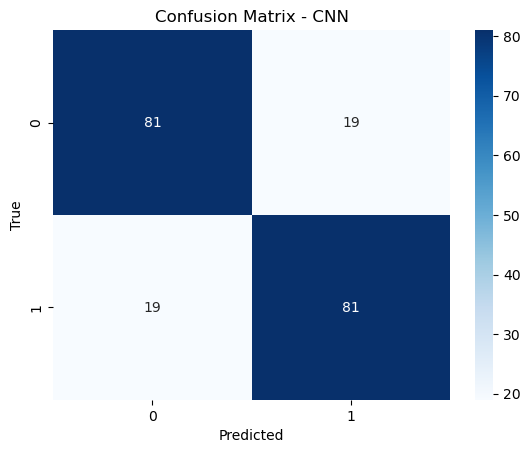

In [9]:
model_cnn = build_cnn()
model_cnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model_cnn.fit(X_train, y_train,steps_per_epoch=50, epochs=20, batch_size=32, validation_split=0.1, verbose=1)

# Predict + Evaluate
y_pred_cnn = (model_cnn.predict(X_test) > 0.5).astype(int)
print("CNN Classification Report:")
print(classification_report(y_test, y_pred_cnn))

# Confusion Matrix
cm_cnn = confusion_matrix(y_test, y_pred_cnn)
sns.heatmap(cm_cnn, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - CNN")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

## LSTM

Epoch 1/20


C:\Users\ATHAK\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


22/50 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.5028 - loss: 0.6939

C:\Users\ATHAK\AppData\Roaming\Python\Python312\site-packages\keras\src\trainers\epoch_iterator.py:116: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


50/50 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - accuracy: 0.5214 - loss: 0.6926 - val_accuracy: 0.7250 - val_loss: 0.6838
Epoch 2/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.7028 - loss: 0.6639 - val_accuracy: 0.8000 - val_loss: 0.6170
Epoch 3/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.8718 - loss: 0.4753 - val_accuracy: 0.8125 - val_loss: 0.4469
Epoch 4/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.9234 - loss: 0.2269 - val_accuracy: 0.8000 - val_loss: 0.4333
Epoch 5/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.9816 - loss: 0.0693 - val_accuracy: 0.8125 - val_loss: 0.6294
Epoch 6/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.9949 - loss: 0.0238 - val_accuracy: 0.8000 - val_loss: 0.6732
Epoch 7/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.9964 - loss: 0.0159 - val_accuracy: 0.8125 - val_loss: 0.7734
Epoch 8/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 1.0000 - loss: 0.0086 - val_accuracy: 0.7750 - val_loss: 0.

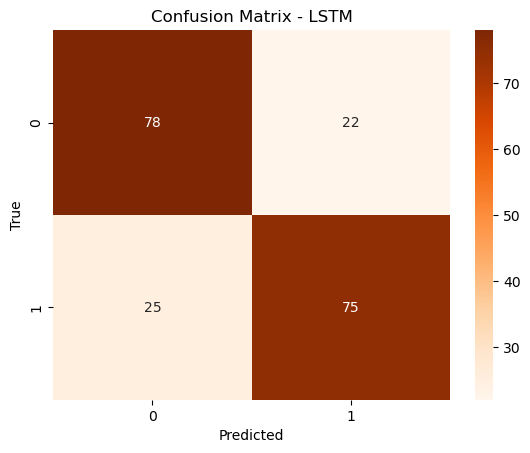

In [10]:
model_lstm = build_lstm()
model_lstm.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model_lstm.fit(X_train, y_train,steps_per_epoch=50, epochs=20, batch_size=32, validation_split=0.1, verbose=1)

y_pred_lstm = (model_lstm.predict(X_test) > 0.5).astype(int)
print("LSTM Classification Report:")
print(classification_report(y_test, y_pred_lstm))

cm_lstm = confusion_matrix(y_test, y_pred_lstm)
sns.heatmap(cm_lstm, annot=True, fmt='d', cmap='Oranges')
plt.title("Confusion Matrix - LSTM")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

## BI-LSTM

Epoch 1/20


C:\Users\ATHAK\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


23/50 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - accuracy: 0.5251 - loss: 0.6945

C:\Users\ATHAK\AppData\Roaming\Python\Python312\site-packages\keras\src\trainers\epoch_iterator.py:116: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


50/50 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - accuracy: 0.5153 - loss: 0.6943 - val_accuracy: 0.6625 - val_loss: 0.6895
Epoch 2/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.6291 - loss: 0.6801 - val_accuracy: 0.7375 - val_loss: 0.6590
Epoch 3/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.7793 - loss: 0.5823 - val_accuracy: 0.8250 - val_loss: 0.4810
Epoch 4/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.9169 - loss: 0.2759 - val_accuracy: 0.7625 - val_loss: 0.4101
Epoch 5/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.9705 - loss: 0.1236 - val_accuracy: 0.7750 - val_loss: 0.4945
Epoch 6/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.9875 - loss: 0.0532 - val_accuracy: 0.8000 - val_loss: 0.6469
Epoch 7/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.9945 - loss: 0.0291 - val_accuracy: 0.8000 - val_loss: 0.7737
Epoch 8/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.9983 - loss: 0.0156 - val_accuracy: 0.7875 - val_loss: 0.

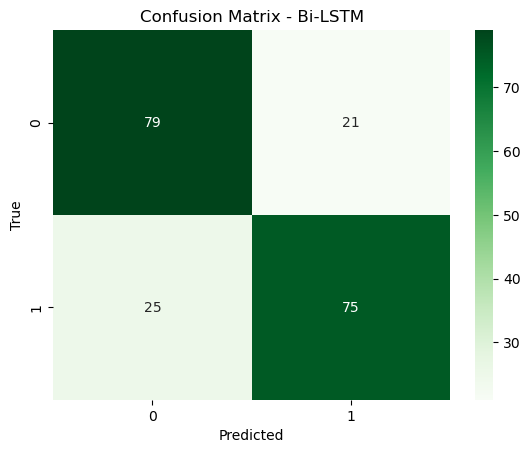

In [11]:
model_bilstm = build_bilstm()
model_bilstm.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model_bilstm.fit(X_train, y_train,steps_per_epoch=50, epochs=20, batch_size=32, validation_split=0.1, verbose=1)

y_pred_bilstm = (model_bilstm.predict(X_test) > 0.5).astype(int)
print("Bi-LSTM Classification Report:")
print(classification_report(y_test, y_pred_bilstm))

cm_bilstm = confusion_matrix(y_test, y_pred_bilstm)
sns.heatmap(cm_bilstm, annot=True, fmt='d', cmap='Greens')
plt.title("Confusion Matrix - Bi-LSTM")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()


results = [
    {"model": "CNN", "accuracy": np.mean(y_pred_cnn.flatten() == y_test), "f1": classification_report(y_test, y_pred_cnn, output_dict=True)['weighted avg']['f1-score'], "params": model_cnn.count_params()},
    {"model": "LSTM", "accuracy": np.mean(y_pred_lstm.flatten() == y_test), "f1": classification_report(y_test, y_pred_lstm, output_dict=True)['weighted avg']['f1-score'], "params": model_lstm.count_params()},
    {"model": "Bi-LSTM", "accuracy": np.mean(y_pred_bilstm.flatten() == y_test), "f1": classification_report(y_test, y_pred_bilstm, output_dict=True)['weighted avg']['f1-score'], "params": model_bilstm.count_params()}
]


import os
os.makedirs("metrics", exist_ok=True)

metrics_df = pd.DataFrame(results)
metrics_df.to_csv("metrics/cnn_lstm_metrics2.csv", index=False)

C:\Users\ATHAK\AppData\Local\Temp\ipykernel_11008\3607321668.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=metrics_df, x='model', y='accuracy', palette='Set2')


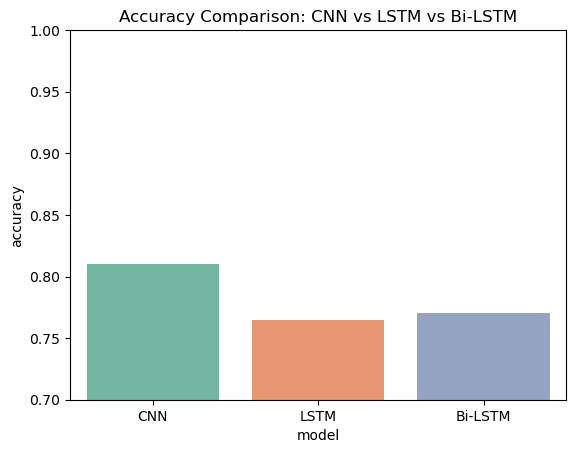

In [14]:
# ---- Summary Plot ---- #
sns.barplot(data=metrics_df, x='model', y='accuracy', palette='Set2')
plt.title("Accuracy Comparison: CNN vs LSTM vs Bi-LSTM")
plt.ylim(0.7, 1.0)
plt.show()

## comparison table

In [18]:
from sklearn.metrics import accuracy_score, classification_report

# Assume y_test and predictions: y_pred_cnn, y_pred_lstm, y_pred_bilstm
# And models: model_cnn, model_lstm, model_bilstm

# Generate metrics for CNN
report_cnn = classification_report(y_test, y_pred_cnn, output_dict=True, zero_division=0)
acc_cnn = accuracy_score(y_test, y_pred_cnn)
f1_cnn = report_cnn['weighted avg']['f1-score']
prec_cnn = report_cnn['weighted avg']['precision']
rec_cnn = report_cnn['weighted avg']['recall']

# Generate metrics for LSTM
report_lstm = classification_report(y_test, y_pred_lstm, output_dict=True, zero_division=0)
acc_lstm = accuracy_score(y_test, y_pred_lstm)
f1_lstm = report_lstm['weighted avg']['f1-score']
prec_lstm = report_lstm['weighted avg']['precision']
rec_lstm = report_lstm['weighted avg']['recall']

# Generate metrics for Bi-LSTM
report_bilstm = classification_report(y_test, y_pred_bilstm, output_dict=True, zero_division=0)
acc_bilstm = accuracy_score(y_test, y_pred_bilstm)
f1_bilstm = report_bilstm['weighted avg']['f1-score']
prec_bilstm = report_bilstm['weighted avg']['precision']
rec_bilstm = report_bilstm['weighted avg']['recall']

# Collect all results
results = [
    {"Model": "CNN", "Accuracy": acc_cnn, "F1-Score": f1_cnn, "Precision": prec_cnn, "Recall": rec_cnn, "Parameters": model_cnn.count_params()},
    {"Model": "LSTM", "Accuracy": acc_lstm, "F1-Score": f1_lstm, "Precision": prec_lstm, "Recall": rec_lstm, "Parameters": model_lstm.count_params()},
    {"Model": "Bi-LSTM", "Accuracy": acc_bilstm, "F1-Score": f1_bilstm, "Precision": prec_bilstm, "Recall": rec_bilstm, "Parameters": model_bilstm.count_params()}
]

# Convert to DataFrame
metrics_df = pd.DataFrame(results)

# Save metrics to CSV
import os
os.makedirs("metrics", exist_ok=True)
metrics_df.to_csv("metrics/cnn_lstm_metrics2.csv", index=False)

# Display the metrics table
print("\n CNN, LSTM, Bi-LSTM Metrics Table:")
print(metrics_df)


 CNN, LSTM, Bi-LSTM Metrics Table:
     Model  Accuracy  F1-Score  Precision  Recall  Parameters
0      CNN     0.810  0.810000   0.810000   0.810      730369
1     LSTM     0.765  0.764947   0.765239   0.765      693633
2  Bi-LSTM     0.770  0.769908   0.770433   0.770      747137


In [19]:
import joblib
# CNN
model_cnn.save("best_model_cnn.h5")
joblib.dump(tokenizer, "tokenizer_cnn.pkl")

# LSTM
model_lstm.save("best_model_lstm.h5")
joblib.dump(tokenizer, "tokenizer_lstm.pkl")

# Bi-LSTM
model_bilstm.save("best_model_bilstm.h5")
joblib.dump(tokenizer, "tokenizer_bilstm.pkl")

['tokenizer_bilstm.pkl']